# <p style="background-color:navy;font-family:Tahoma;color:ivory;font-size:150%;text-align:center;border-radius:10px 0px;">Dự đoán cổ phiếu</p>

![](https://image.vietstock.vn/2022/03/03/ScreenHunter%20179_1642347.png)

**Nêu vấn đề**

Thụ trường chứng khoán là một trong những kênh đầu tư sinh lời tốt đối với các nhà đầu tư tại Việt Nam cũng các như đầu tư trên thế giới. Nhưng để lựa chọn một cổ phiếu tốt để đầu tư măng lại mức tăng trưởng cho tương lai thì cần phải phụ thuộc nhiều yếu tố.

Và một trong những yếu tố đó là thì có các chỉ số cơ bản để mình dựa vào và đi tìm cổ phiếu tốt cho việc đầu tư.
  

**Mục tiêu**

Chọn được cổ phiếu tốt từ việc phân tích dựa trên Machine Learning.
  
  
[]()

TABLE OF CONTENTS

- [1\. IMPORTING LIBRARIES](vscode-file://vscode-app/c:/Users/Admin/AppData/Local/Programs/Azure%20Data%20Studio/resources/app/out/vs/code/electron-browser/workbench/workbench.html#1)
- [2\. LOADING DATA](vscode-file://vscode-app/c:/Users/Admin/AppData/Local/Programs/Azure%20Data%20Studio/resources/app/out/vs/code/electron-browser/workbench/workbench.html#2)
- [3\. DATA CLEANING](vscode-file://vscode-app/c:/Users/Admin/AppData/Local/Programs/Azure%20Data%20Studio/resources/app/out/vs/code/electron-browser/workbench/workbench.html#3)
- [4\. DATA PREPROCESSING](vscode-file://vscode-app/c:/Users/Admin/AppData/Local/Programs/Azure%20Data%20Studio/resources/app/out/vs/code/electron-browser/workbench/workbench.html#4)
- [5\. DIMENSIONALITY REDUCTION](vscode-file://vscode-app/c:/Users/Admin/AppData/Local/Programs/Azure%20Data%20Studio/resources/app/out/vs/code/electron-browser/workbench/workbench.html#5)
- [6\. CLUSTERING](vscode-file://vscode-app/c:/Users/Admin/AppData/Local/Programs/Azure%20Data%20Studio/resources/app/out/vs/code/electron-browser/workbench/workbench.html#6)
- [7\. EVALUATING MODELS](vscode-file://vscode-app/c:/Users/Admin/AppData/Local/Programs/Azure%20Data%20Studio/resources/app/out/vs/code/electron-browser/workbench/workbench.html#7)
- [8\. CUSTOMERS PROFILING](vscode-file://vscode-app/c:/Users/Admin/AppData/Local/Programs/Azure%20Data%20Studio/resources/app/out/vs/code/electron-browser/workbench/workbench.html#8)
- [9\. CONCLUSION](vscode-file://vscode-app/c:/Users/Admin/AppData/Local/Programs/Azure%20Data%20Studio/resources/app/out/vs/code/electron-browser/workbench/workbench.html#9)

<a id = "1"></a>
# <p style="background-color:navy;font-family:Tahoma;color:ivory;font-size:150%;text-align:center;border-radius:10px 0px;">Importing Libraries</p>

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from dython.nominal import associations
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
print('OK')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import warnings



OK


<a id = "2"></a>
# <p style="background-color:navy;font-family:Tahoma;color:ivory;font-size:150%;text-align:center;border-radius:10px 0px;">Loading Data</p>

In [239]:

#Read and write to excel
dataStock =  pd.read_excel(r'C:\Users\Admin\Desktop\K_Means\KQKD_2021.6T_20220305.xlsx')
dataStock.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,KẾT QUẢ KINH DOANH NĂM 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Cập nhật đến ngày 05/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Đvt: Tỷ đồng
4,NaN,STT,Mã CK,Sàn,Trạng thái,NaN,Lợi nhuận ròng,NaN,NaN,NaN,NaN,EPS,BVPS,P/E\nHiện tại
5,NaN,NaN,NaN,NaN,NaN,NaN,2021,2020,+/-,KH 2021,% KH,2021,2021,NaN
6,NaN,1,BXH,HNX,Kiểm toán,Đơn lẻ,1.629013,3.99,-59.2,1.7595,93,541,18502,30.5
7,NaN,2,VAF,HOSE,Kiểm toán,Đơn lẻ,27.980337,21.56,29.8,22.5,124,743,12301,19.9
8,NaN,3,HLD,HNX,Kiểm toán,Đơn lẻ,15.22132,74.26,-79.5,13.7,111,761,22301,57.3
9,NaN,4,PSH,HOSE,Kiểm toán,Hợp nhất,318.358427,28.06,1034.7,161.777,197,2524,14813,10.5


In [240]:
#Read and write to excel
dataStock =  pd.read_excel(r'C:\Users\Admin\Desktop\K_Means\KQKD_2021.6T_20220305.xlsx', usecols = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 6',
                                                                     'Unnamed: 7',  'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 13'])

dataStock.head(10)

,Unnamed: 2,Unnamed: 3,Unnamed: 6,Unnamed: 7,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Đvt: Tỷ đồng
4,Mã CK,Sàn,Lợi nhuận ròng,NaN,NaN,NaN,EPS,P/E\nHiện tại
5,NaN,NaN,2021,2020,KH 2021,% KH,2021,NaN
6,BXH,HNX,1.629013,3.99,1.7595,93,541,30.5
7,VAF,HOSE,27.980337,21.56,22.5,124,743,19.9
8,HLD,HNX,15.22132,74.26,13.7,111,761,57.3
9,PSH,HOSE,318.358427,28.06,161.777,197,2524,10.5


In [241]:
dataStock = dataStock.iloc[6:]
dataStock

,Unnamed: 2,Unnamed: 3,Unnamed: 6,Unnamed: 7,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 13
6,BXH,HNX,1.629013,3.99,1.7595,93,541,30.5
7,VAF,HOSE,27.980337,21.56,22.5,124,743,19.9
8,HLD,HNX,15.22132,74.26,13.7,111,761,57.3
9,PSH,HOSE,318.358427,28.06,161.777,197,2524,10.5
10,VIE,HNX,1.857925,0.06,-0.1986,-936,901,10.4
...,...,...,...,...,...,...,...,...
746,BST,HNX,1.519109,1.53,1.6,95,1381,11.4
747,FIR,HOSE,39.745325,48.32,70,57,1470,34.3
748,CAP,HNX,57.251128,30.12,37,155,10934,8.2
749,IDV,HNX,155.752618,210.29,135,115,8782,7.8


In [242]:
dataStock.rename(columns = {'Unnamed: 2' : 'MaCoPhieu', 'Unnamed: 3' : 'SanChungKhoan',  'Unnamed: 6' : 'LoiNhuanRong_2021', 'Unnamed: 7' : 'LoiNhuanRong_2020','Unnamed: 9' : 'KeHoach', 
                        'Unnamed: 10' : 'PhanTram_KeHoach', 'Unnamed: 11' : 'EPS', 'Unnamed: 12' : 'BVPS', 'Unnamed: 13' : 'PE'}, inplace = True)
dataStock

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE
6,BXH,HNX,1.629013,3.99,1.7595,93,541,30.5
7,VAF,HOSE,27.980337,21.56,22.5,124,743,19.9
8,HLD,HNX,15.22132,74.26,13.7,111,761,57.3
9,PSH,HOSE,318.358427,28.06,161.777,197,2524,10.5
10,VIE,HNX,1.857925,0.06,-0.1986,-936,901,10.4
...,...,...,...,...,...,...,...,...
746,BST,HNX,1.519109,1.53,1.6,95,1381,11.4
747,FIR,HOSE,39.745325,48.32,70,57,1470,34.3
748,CAP,HNX,57.251128,30.12,37,155,10934,8.2
749,IDV,HNX,155.752618,210.29,135,115,8782,7.8


<br><br>

### **<p style="background-color:white;font-family:tahoma;color:navy;font-size:120%;text-align:left">Thông tin từng cột</p>**

* **8 cột dữ liệu**
    + MaCoPhieu: mã cổ phiếu của các công ty
    + SanChungKhoan: Sàn chứng khoán gồm có HOSE, HNX
    + LoiNhuanRong_2021: là khoảng lợi nhuận từ doanh thu trừ đi tất cả chi phí
    + LoiNhuanRong_2020: là khoảng lợi nhuận từ doanh thu trừ đi tất cả chi phí
    + KeHoach: kế hoạch đặt ra trong năm 2021
    + PhanTram_KeHoach: tỷ lệ phần trăm lợi nhuận mà công ty đó thực hiện được trong năm 2021  
    + EPS: tỷ suất lợi nhuận trên mỗi cổ phần
    + PE: Hệ số giá trên lợi nhuận một cổ phiếu, là tỷ số tài chính dùng để đánh giá mối liên hệ giữa thị giá hiện tại của một cổ phiếu và tỉ suất lợi nhuận trên cổ phần, hay cho biết nhà đầu tư sẵn sàng trả giá bao nhiêu cho một cổ phiếu trên thị trường chứng khoán

<br><br>

<a id = "3"></a>
# <p style="background-color:navy;font-family:Tahoma;color:ivory;font-size:150%;text-align:center;border-radius:10px 0px;">Data Cleaning and EDA</p>

<br>

### **<p style="background-color:white;font-family:tahoma;color:navy;font-size:120%;text-align:left">Data Cleaning</p>**

In [243]:
dataStock.columns

Index(['MaCoPhieu', 'SanChungKhoan', 'LoiNhuanRong_2021', 'LoiNhuanRong_2020',
       'KeHoach', 'PhanTram_KeHoach', 'EPS', 'PE'],
      dtype='object')

In [244]:
dataStock.shape

(745, 8)

In [245]:
data_info = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_Unique'])

for i in range(0, len(dataStock.columns)):
    data_info.loc[i] = [dataStock.columns[i],
                        dataStock[dataStock.columns[i]].isnull().sum(),
                        dataStock[dataStock.columns[i]].dtypes,
                        dataStock[dataStock.columns[i]].nunique()] 
    
data_info


,Name of Col,Num of Null,Dtype,N_Unique
0,MaCoPhieu,0,object,745
1,SanChungKhoan,0,object,2
2,LoiNhuanRong_2021,0,object,744
3,LoiNhuanRong_2020,0,object,677
4,KeHoach,0,object,558
5,PhanTram_KeHoach,0,object,294
6,EPS,0,object,693
7,PE,0,object,421


In [246]:
#tìm các cột dạng number dựa trên object
dataStock.describe(include = 'object')

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE
count,745,745,745.000000,745,745,745,745,745.0
unique,745,2,744.000000,677,558,294,693,421.0
top,BXH,HOSE,4.375395,-,-,-,3343,10.0
freq,1,401,2.000000,46,43,44,3,10.0


In [247]:
# Thay thế giá trị "-" thành NaN
dataStock = dataStock.replace(['-'], np.nan)
dataStock.head()

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE
6,BXH,HNX,1.629013,3.99,1.7595,93.0,541,30.5
7,VAF,HOSE,27.980337,21.56,22.5000,124.0,743,19.9
8,HLD,HNX,15.221320,74.26,13.7000,111.0,761,57.3
9,PSH,HOSE,318.358427,28.06,161.7770,197.0,2524,10.5
10,VIE,HNX,1.857925,0.06,-0.1986,-936.0,901,10.4


In [248]:
#Convert numerical variables to numerical data types
dataStock = dataStock.astype({'LoiNhuanRong_2021':float, 'LoiNhuanRong_2020':float,'KeHoach':float,'PhanTram_KeHoach':float,'EPS':float,'PE':float})

In [249]:
# Xóa data NaN
dataStock.dropna(inplace = True)
dataStock.shape

(661, 8)

In [250]:
#Describe numerical variables
dataStock.describe()

,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,563.849635,393.801059,522.266779,381.385779,2535.875946,55.934039
std,2658.045942,1824.206397,2681.845857,4156.761902,2821.657769,252.912597
min,0.019610,-906.600000,-9.986250,-936.000000,3.000000,2.900000
25%,13.020787,8.510000,12.000000,74.000000,743.000000,10.000000
50%,44.014584,34.130000,42.111000,108.000000,1643.000000,14.500000
75%,206.264269,145.590000,172.915514,149.000000,3493.000000,29.300000
max,39016.681000,27351.280000,37500.000000,100679.000000,33363.000000,5200.000000


In [251]:
#Xóa PE < 15 và PE > 5
dataStock = dataStock.drop(dataStock[(dataStock.PE < 5) | (dataStock.PE > 15) ].index)
dataStock

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE
9,PSH,HOSE,318.358427,28.06,161.7770,197.0,2524.0,10.5
10,VIE,HNX,1.857925,0.06,-0.1986,-936.0,901.0,10.4
11,CLH,HNX,54.488143,45.85,29.6250,184.0,4541.0,6.9
13,PMS,HNX,24.222250,21.18,15.0000,161.0,3363.0,7.7
15,SDN,HNX,13.028100,11.49,6.4240,203.0,8581.0,5.6
...,...,...,...,...,...,...,...,...
744,BRC,HOSE,21.411303,21.12,21.5000,100.0,1730.0,9.3
745,DPC,HNX,4.860160,8.20,6.7500,72.0,2172.0,11.4
746,BST,HNX,1.519109,1.53,1.6000,95.0,1381.0,11.4
748,CAP,HNX,57.251128,30.12,37.0000,155.0,10934.0,8.2


In [252]:
#Xóa lợi nhuận 2 năm liên tiếp nhỏ hơn 500 tỷ
dataStock = dataStock.drop(dataStock[(dataStock.LoiNhuanRong_2021 < 500) | (dataStock.LoiNhuanRong_2020 < 500) 
                                        | (dataStock.PhanTram_KeHoach < 20) | (dataStock.EPS < 5000)].index)
dataStock

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE
22,VND,HOSE,2382.923585,692.77,880.00,271.0,7683.0,10.0
39,DGC,HOSE,2388.150971,906.67,1100.00,217.0,14628.0,12.1
124,HPG,HOSE,34478.143197,13450.30,18000.00,192.0,8636.0,5.8
146,VCS,HNX,1772.059864,1428.42,1439.25,123.0,11262.0,9.4
263,HDG,HOSE,1090.016437,979.14,1254.00,87.0,6836.0,10.6
278,VCB,HOSE,21908.052000,18451.31,37500.00,58.0,5907.0,14.4
315,REE,HOSE,1854.653140,1628.08,1768.90,105.0,6001.0,12.5
317,VHM,HOSE,39016.681000,27351.28,35000.00,111.0,10845.0,7.2
393,DBC,HOSE,829.557934,1400.30,827.00,100.0,7503.0,10.4
429,VHC,HOSE,1101.225562,719.31,700.00,157.0,6052.0,13.3


In [253]:
dataStock.to_csv(r'C:\Users\Admin\Desktop\K_Means\ListStock.csv', index = False, header = True)

In [254]:
dataStock.shape

(14, 8)

In [255]:
#Describe all variables 
dataStock.describe(include = "all")

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE
count,14,14,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
unique,14,2,NaN,NaN,NaN,NaN,NaN,NaN
top,VND,HOSE,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,9347.918214,5824.792857,9288.217857,196.000000,7887.214286,10.078571
std,NaN,NaN,13381.832277,8581.879067,14252.683877,200.723307,2676.289630,2.495590
min,NaN,NaN,829.557934,691.310000,365.000000,58.000000,5144.000000,5.800000
25%,NaN,NaN,1421.893720,757.960000,840.250000,101.250000,6013.750000,8.050000
50%,NaN,NaN,2118.788362,1189.720000,1177.000000,140.000000,7169.500000,10.200000
75%,NaN,NaN,14307.439358,9650.762500,13942.225000,210.750000,8468.000000,11.775000


In [256]:
#PE > 10 là 1
#PE <= 10 là 0
dataStock['PE_'] = np.where(dataStock['PE'] > 10, 1, 0)

In [257]:
display(dataStock.shape, dataStock.head(2))

(14, 9)

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE,PE_
22,VND,HOSE,2382.923585,692.77,880.0,271.0,7683.0,10.0,0
39,DGC,HOSE,2388.150971,906.67,1100.0,217.0,14628.0,12.1,1


<span style="background-color: white; color: navy; font-family: tahoma; font-size: 120%; font-weight: bold;">Visualization Analysis</span>

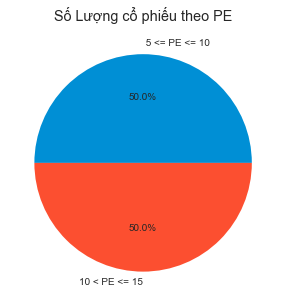

In [258]:
x = dataStock['PE_'].value_counts().sort_values()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=[' 5 <= PE <= 10 ', '10 < PE <= 15'], autopct = '%1.1f%%', wedgeprops = {'linewidth': 5})
plt.title('Số Lượng cổ phiếu theo PE')
plt.style.use(['fivethirtyeight'])
plt.show()

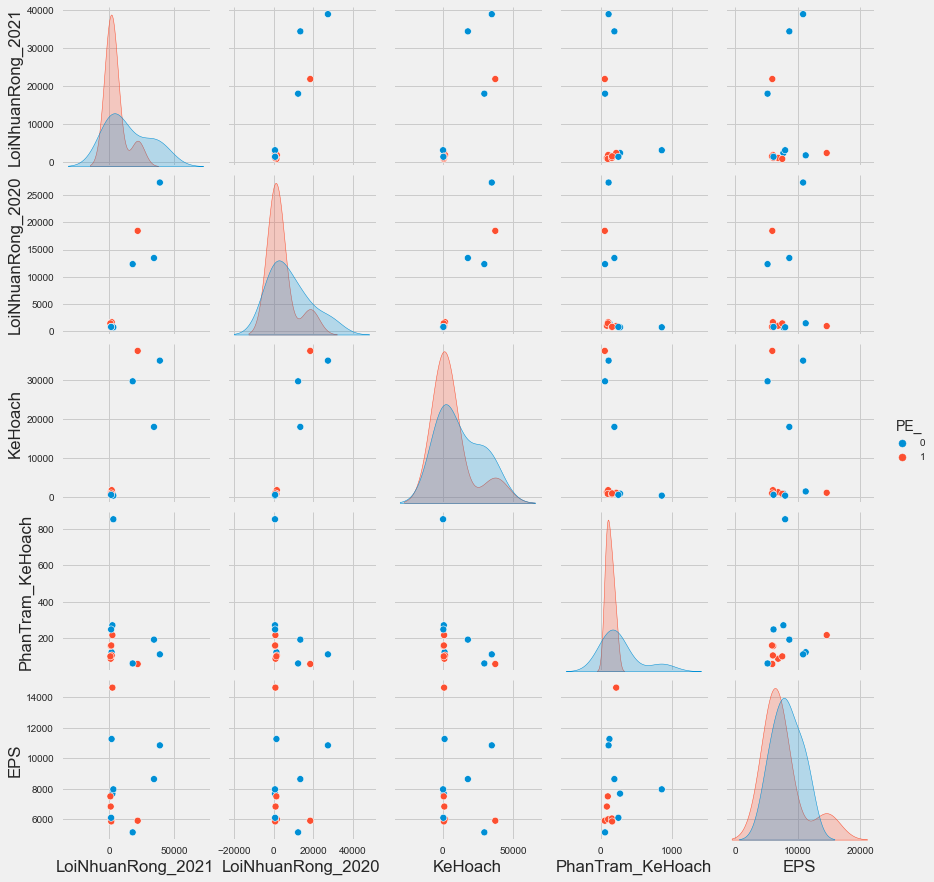

In [259]:
to_plot = ['LoiNhuanRong_2021', 'LoiNhuanRong_2020', 'KeHoach', 'PhanTram_KeHoach', 'EPS', 'PE_']

sns.pairplot(dataStock[to_plot], hue = "PE_")
# plt.style.use(['fivethirtyeight'])
plt.show()

**Normalized\_LoiNhuanRong\_2021**

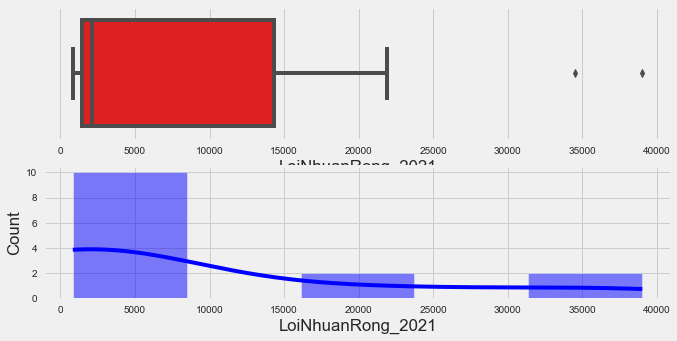

In [260]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = dataStock, x = 'LoiNhuanRong_2021', color = 'red', ax = axes[0])
sns.histplot(data = dataStock, x = 'LoiNhuanRong_2021', kde=True, color='blue', ax = axes[1])
plt.show()

In [261]:
# define the function for capping the outliers

print(f'old shape: {dataStock.shape}')
q1 = dataStock.LoiNhuanRong_2021.quantile(0.25)
q3 = dataStock.LoiNhuanRong_2021.quantile(0.75)

iqr = q3 - q1

upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print(f'upper bound value: {upper_bound}')
print(f'lower bound value: {lower_bound}')

dataStock.loc[dataStock['LoiNhuanRong_2021'] > upper_bound, 'LoiNhuanRong_2021'] = upper_bound
dataStock.loc[dataStock['LoiNhuanRong_2021'] < lower_bound, 'LoiNhuanRong_2021'] = lower_bound

print(f'new shape: {dataStock.shape}, There is no change of the shape.')

old shape: (14, 9)
upper bound value: 33635.757815125005
lower bound value: -17906.424737875004
new shape: (14, 9), There is no change of the shape.


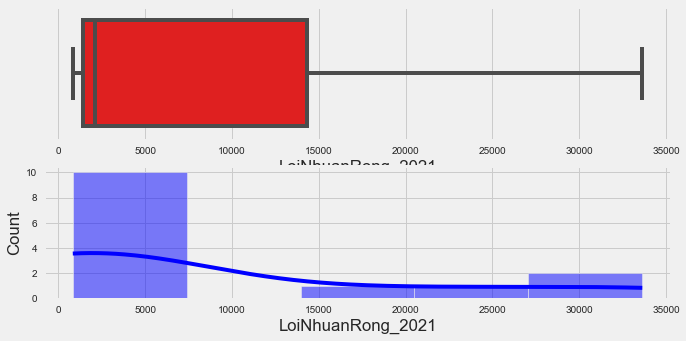

In [262]:
# Recheck

fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = dataStock, x = 'LoiNhuanRong_2021', color = 'red', ax = axes[0])
sns.histplot(data = dataStock, x = 'LoiNhuanRong_2021', kde=True, color='blue', ax = axes[1])

plt.show()

**Normalized\_LoiNhuanRong\_2020**

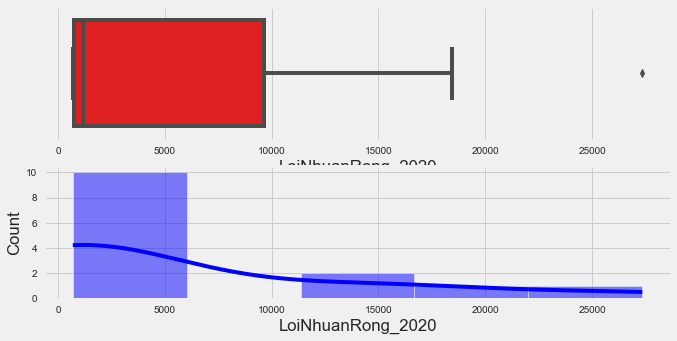

In [263]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = dataStock, x = 'LoiNhuanRong_2020', color = 'red', ax = axes[0])
sns.histplot(data = dataStock, x = 'LoiNhuanRong_2020', kde=True, color='blue', ax = axes[1])
plt.show()

In [264]:
# define the function for capping the outliers

print(f'old shape: {dataStock.shape}')
q1 = dataStock.LoiNhuanRong_2021.quantile(0.25)
q3 = dataStock.LoiNhuanRong_2021.quantile(0.75)

iqr = q3 - q1

upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print(f'upper bound value: {upper_bound}')
print(f'lower bound value: {lower_bound}')

dataStock.loc[dataStock['LoiNhuanRong_2020'] > upper_bound, 'LoiNhuanRong_2020'] = upper_bound
dataStock.loc[dataStock['LoiNhuanRong_2020'] < lower_bound, 'LoiNhuanRong_2020'] = lower_bound

print(f'new shape: {dataStock.shape}, There is no change of the shape.')

old shape: (14, 9)
upper bound value: 33635.757815125005
lower bound value: -17906.424737875004
new shape: (14, 9), There is no change of the shape.


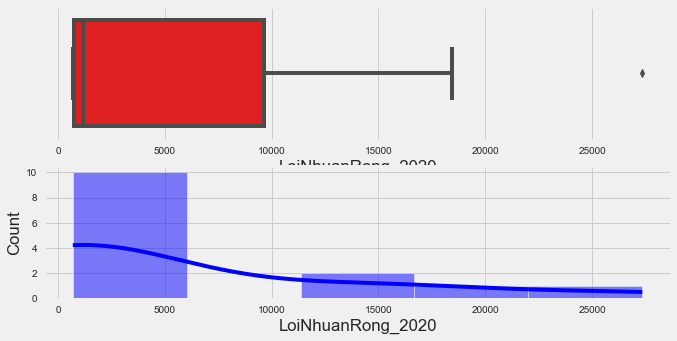

In [265]:
# Recheck

fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = dataStock, x = 'LoiNhuanRong_2020', color = 'red', ax = axes[0])
sns.histplot(data = dataStock, x = 'LoiNhuanRong_2020', kde=True, color='blue', ax = axes[1])

plt.show()

**Normalized\_KeHoach**

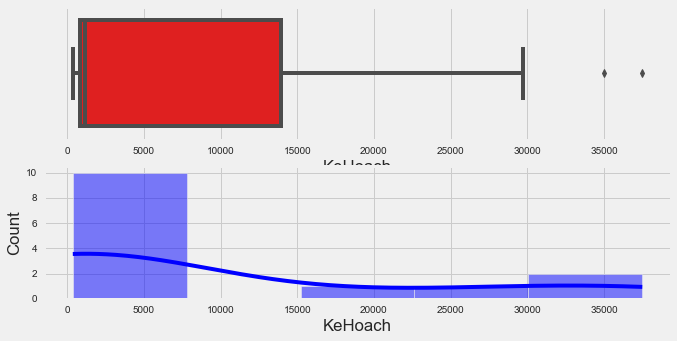

In [266]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = dataStock, x = 'KeHoach', color = 'red', ax = axes[0])
sns.histplot(data = dataStock, x = 'KeHoach', kde=True, color='blue', ax = axes[1])
plt.show()

In [267]:
# define the function for capping the outliers

print(f'old shape: {dataStock.shape}')
q1 = dataStock.KeHoach.quantile(0.25)
q3 = dataStock.KeHoach.quantile(0.75)

iqr = q3 - q1

upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print(f'upper bound value: {upper_bound}')
print(f'lower bound value: {lower_bound}')

dataStock.loc[dataStock['KeHoach'] > upper_bound, 'KeHoach'] = upper_bound
dataStock.loc[dataStock['KeHoach'] < lower_bound, 'KeHoach'] = lower_bound

print(f'new shape: {dataStock.shape}, There is no change of the shape.')

old shape: (14, 9)
upper bound value: 33595.1875
lower bound value: -18812.7125
new shape: (14, 9), There is no change of the shape.


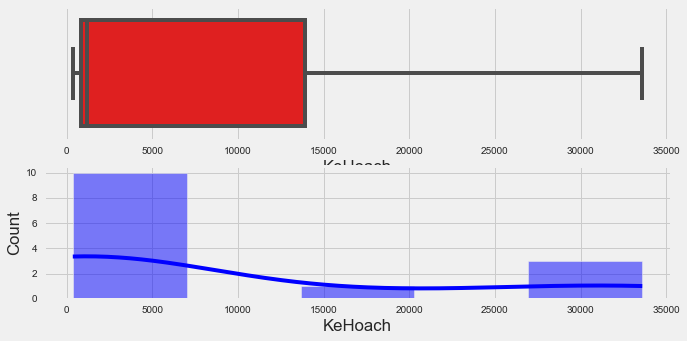

In [268]:
# Recheck

fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = dataStock, x = 'KeHoach', color = 'red', ax = axes[0])
sns.histplot(data = dataStock, x = 'KeHoach', kde=True, color='blue', ax = axes[1])

plt.show()

**Normalized\_%KeHoach**

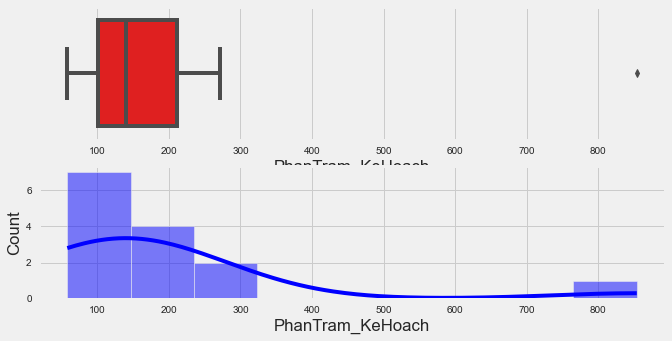

In [269]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = dataStock, x = 'PhanTram_KeHoach', color = 'red', ax = axes[0])
sns.histplot(data = dataStock, x = 'PhanTram_KeHoach', kde=True, color='blue', ax = axes[1])
plt.show()

In [270]:
# define the function for capping the outliers

print(f'old shape: {dataStock.shape}')
q1 = dataStock.PhanTram_KeHoach.quantile(0.25)
q3 = dataStock.PhanTram_KeHoach.quantile(0.75)

iqr = q3 - q1

upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print(f'upper bound value: {upper_bound}')
print(f'lower bound value: {lower_bound}')

dataStock.loc[dataStock['PhanTram_KeHoach'] > upper_bound, 'PhanTram_KeHoach'] = upper_bound
dataStock.loc[dataStock['PhanTram_KeHoach'] < lower_bound, 'PhanTram_KeHoach'] = lower_bound

print(f'new shape: {dataStock.shape}, There is no change of the shape.')

old shape: (14, 9)
upper bound value: 375.0
lower bound value: -63.0
new shape: (14, 9), There is no change of the shape.


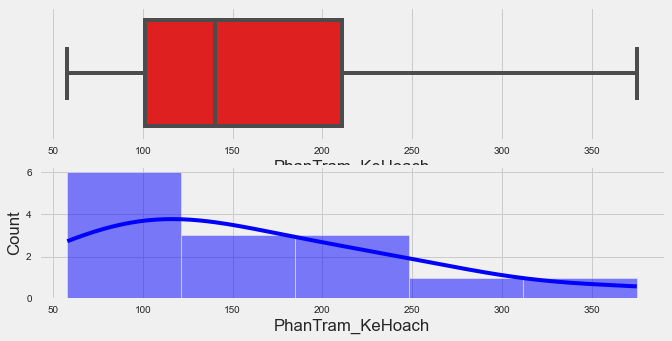

In [195]:
# Recheck

fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = dataStock, x = 'PhanTram_KeHoach', color = 'red', ax = axes[0])
sns.histplot(data = dataStock, x = 'PhanTram_KeHoach', kde=True, color='blue', ax = axes[1])

plt.show()

**Normalized\_EPS**

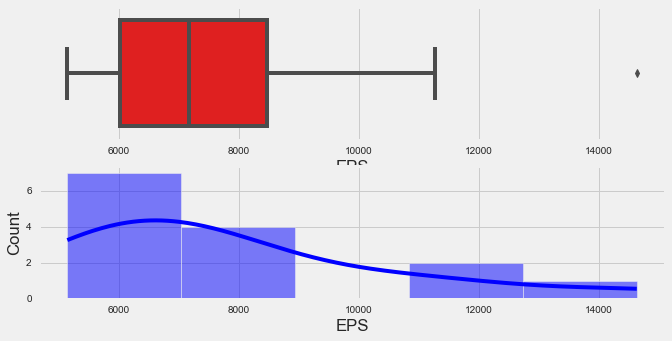

In [271]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = dataStock, x = 'EPS', color = 'red', ax = axes[0])
sns.histplot(data = dataStock, x = 'EPS', kde=True, color='blue', ax = axes[1])
plt.show()

In [272]:
# define the function for capping the outliers

print(f'old shape: {dataStock.shape}')
q1 = dataStock.EPS.quantile(0.25)
q3 = dataStock.EPS.quantile(0.75)

iqr = q3 - q1

upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print(f'upper bound value: {upper_bound}')
print(f'lower bound value: {lower_bound}')

dataStock.loc[dataStock['EPS'] > upper_bound, 'EPS'] = upper_bound
dataStock.loc[dataStock['EPS'] < lower_bound, 'EPS'] = lower_bound

print(f'new shape: {dataStock.shape}, There is no change of the shape.')

old shape: (14, 9)
upper bound value: 12149.375
lower bound value: 2332.375
new shape: (14, 9), There is no change of the shape.


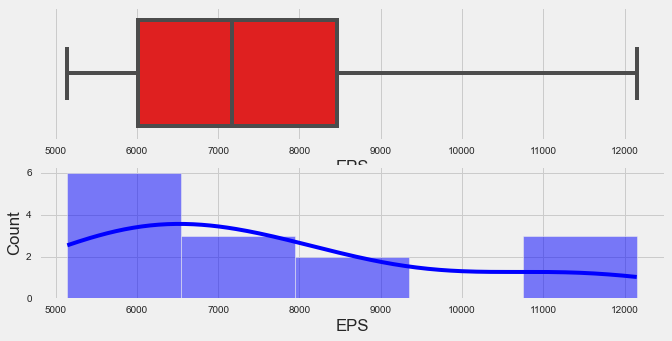

In [273]:
fig, axes = plt.subplots(2, 1, figsize=(10,5))

sns.boxplot(data = dataStock, x = 'EPS', color = 'red', ax = axes[0])
sns.histplot(data = dataStock, x = 'EPS', kde=True, color='blue', ax = axes[1])
plt.show()

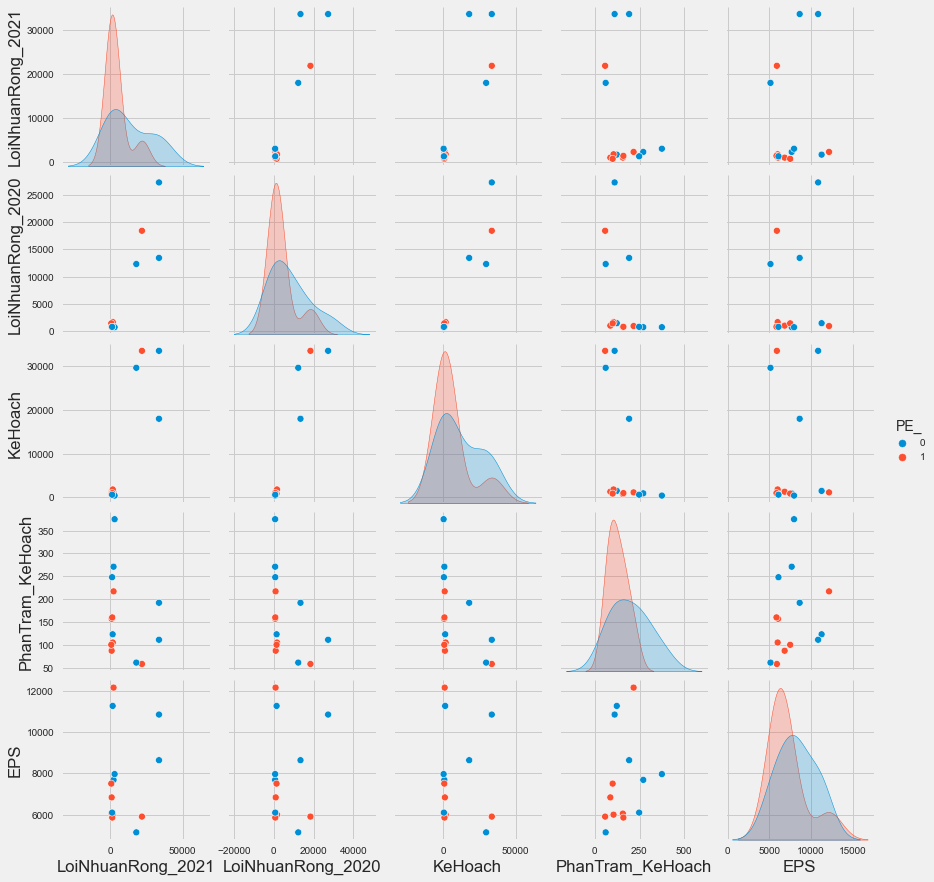

In [274]:
to_plot = ['LoiNhuanRong_2021', 'LoiNhuanRong_2020', 'KeHoach', 'PhanTram_KeHoach', 'EPS', 'PE_']

sns.pairplot(dataStock[to_plot], hue = "PE_")
# plt.style.use(['fivethirtyeight'])
plt.show()

### Correlation Analysis

<ipython-input-275-a77ffd59d8e9>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


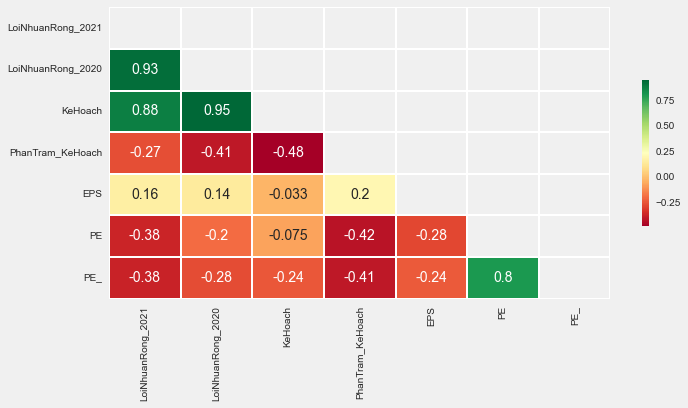

In [275]:
corr_cols = ['LoiNhuanRong_2021', 'LoiNhuanRong_2020', 'KeHoach', 'PhanTram_KeHoach', 'EPS', 'PE', 'PE_']

corr = dataStock[corr_cols].corr()

plt.figure(figsize=(10, 5))

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

heat_map = sns.heatmap(corr,
                       annot = True,
                       cmap = 'RdYlGn',
                       mask = mask,
                       linewidths = 0.1,
                       cbar_kws = {'shrink':0.5})

In [276]:
pd.pivot_table(dataStock, index=['PE_', 'SanChungKhoan'],
               values = ['LoiNhuanRong_2021', 'LoiNhuanRong_2020', 'KeHoach', 'PhanTram_KeHoach',
                         'EPS', 'PE'], aggfunc='mean',
               margins= True)

EPS       KeHoach  LoiNhuanRong_2020  \
PE_ SanChungKhoan                                                 
0   HNX            8681.000000   1001.325000        1091.365000   
    HOSE           8054.400000  16508.037500       10902.130000   
1   HOSE           7186.910714   5740.369643        3550.531429   
All                7710.169643   8908.958929        5824.792857   

                   LoiNhuanRong_2021         PE  PhanTram_KeHoach  
PE_ SanChungKhoan                                                  
0   HNX                  1584.172683   8.350000        185.500000  
    HOSE                18161.765329   8.060000        202.000000  
1   HOSE                 4381.482060  12.014286        126.285714  
All                      8903.396174  10.078571        161.785714

<a id = "4"></a>
# <p style="background-color:navy;font-family:Tahoma;color:ivory;font-size:150%;text-align:center;border-radius:10px 0px;">Data Preprocessing</p>


On this section we will do the data preprocessing for the next step, PCA and Clustering Analysis.

* Label encoding for the categorical features


* Standard scaling for the numerical features


* Creating a subset data frame for dimensionality reduction

#### Label Encoding

In [277]:
# We are able to extract the numerical data of dataset using "._get_numeric_data()" method
# After that, use the set calculation to get the columns of categorical features.

num_cols = dataStock._get_numeric_data().columns
cat_cols = set(dataStock.columns) - set(num_cols)

print(list(cat_cols))

['MaCoPhieu', 'SanChungKhoan']


In [278]:
le = LabelEncoder()

for i in cat_cols:
    dataStock[i] = dataStock[[i]].apply(le.fit_transform)
    
dataStock[cat_cols].head(2)


,MaCoPhieu,SanChungKhoan
22,13,1
39,1,1


#### Standardization

In [279]:
data_scaled = dataStock.copy()

In [280]:
scale_cols = ['MaCoPhieu', 'SanChungKhoan', 'LoiNhuanRong_2021', 'LoiNhuanRong_2020', 'KeHoach',
       'PhanTram_KeHoach', 'EPS', 'PE']

ss = StandardScaler()

for col in scale_cols:
    data_scaled[col] = ss.fit_transform(data_scaled[[col]])
    
display(data_scaled.shape, data_scaled.head(3))

(14, 9)

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE,PE_
22,1.612452,0.408248,-0.546469,-0.620581,-0.617945,1.252442,-0.012571,-0.032673,0
39,-1.364382,0.408248,-0.546030,-0.594716,-0.601013,0.633184,2.053876,0.840577,1
124,-0.620174,0.408248,2.072773,0.922101,0.699688,0.346490,0.428352,-1.779172,0


#### Selection of the number of principal components

In [281]:
data_scaled.head(2)

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE,PE_
22,1.612452,0.408248,-0.546469,-0.620581,-0.617945,1.252442,-0.012571,-0.032673,0
39,-1.364382,0.408248,-0.546030,-0.594716,-0.601013,0.633184,2.053876,0.840577,1


In [282]:
variance_ratio = {}

for i in range(1, len(data_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(data_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()

In [283]:
variance_ratio

{'n_1': 0.39549130991022885,
 'n_2': 0.6310988503064354,
 'n_3': 0.7703072565850048,
 'n_4': 0.8718344915292616,
 'n_5': 0.9577937191517869,
 'n_6': 0.9861369209540821,
 'n_7': 0.9943882121608346,
 'n_8': 0.9992690529769294,
 'n_9': 1.0000000000000002}

#### Elbow Method and Kaiser's Rule at the same time

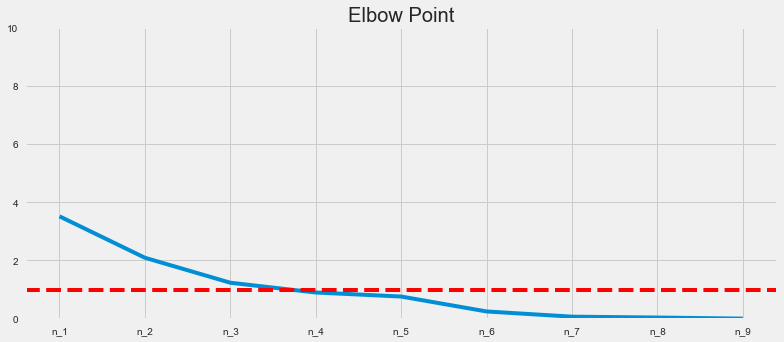

In [284]:
# eigen value
eigen_value = np.sort(pca.explained_variance_)[::-1]

plt.figure(figsize=(12, 5))

plt.plot(variance_ratio.keys(), eigen_value)
plt.ylim(0, 10, 1)
plt.axhline(1, color = 'red', ls = '--')
plt.title('Elbow Point')

plt.show()

In [285]:
eigen_value

array([3.51378818, 2.09328238, 1.23681315, 0.90203043, 0.76371468,
       0.25181845, 0.07330955, 0.04336439, 0.00649418])

In [286]:
print(f'Số lượng giá trị riêng lơn hơn một: {len(eigen_value[eigen_value > 1])}')


Số lượng giá trị riêng lơn hơn một: 3


Ta thấy Elbow =  **n\_3** và số vector trị riêng hớn hơn 1 là **3**. Nên ta sẽ dùng nó.

#### Percent of variation threshold method[¶](https://www.kaggle.com/seungbumlim/how-to-select-the-optimal-number-for-pca-kmeans#Percent-of-variation-threshold-method)

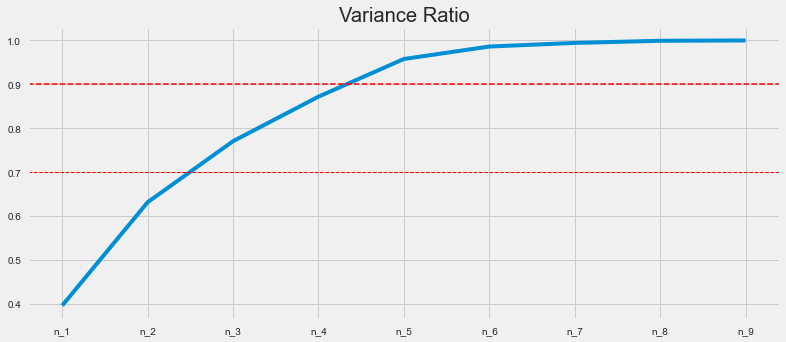

In [287]:
plt.figure(figsize = (12, 5))

plt.plot(variance_ratio.keys(), variance_ratio.values())
plt.axhline(0.7, color = 'red', ls = '--', lw = 1)
plt.axhline(0.9, color = 'red', ls = '--', lw = 1.5)
plt.title("Variance Ratio")

plt.show()

Trong khoảng 0.7 đến 0.9 ta thấy **n\_3** và **n\_4.**

Ta sẽ chọn **n\_3** vì kết quả của Elbow cũng ra **n\_3.** Nên chọn nó sẽ tối ưu hơn.

In [289]:
pca = PCA(n_components = 3, random_state = 42)

pca.fit(data_scaled)
data_pca = pd.DataFrame(pca.transform(data_scaled), 
                        columns = (["PC1", "PC2", "PC3"]))

data_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,14.0,3.172066e-17,1.874510,-1.592060,-1.048453,-0.893045,1.314529,4.200468
PC2,14.0,3.172066e-17,1.446818,-1.784467,-1.574762,0.295937,1.034149,2.170748
PC3,14.0,-6.344132e-17,1.112121,-1.563011,-1.026608,0.171437,0.725862,2.063658


In [301]:
dataStock

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE,PE_,Clusters
22,13,1,2382.923585,692.77,880.0000,271.0,7683.000,10.0,0,0
39,1,1,2388.150971,906.67,1100.0000,217.0,12149.375,12.1,1,3
124,4,1,33635.757815,13450.30,18000.0000,192.0,8636.000,5.8,0,2
146,10,0,1772.059864,1428.42,1439.2500,123.0,11262.000,9.4,0,0
263,3,1,1090.016437,979.14,1254.0000,87.0,6836.000,10.6,1,1
278,8,1,21908.052000,18451.31,33595.1875,58.0,5907.000,14.4,1,4
315,5,1,1854.653140,1628.08,1768.9000,105.0,6001.000,12.5,1,1
317,12,1,33635.757815,27351.28,33595.1875,111.0,10845.000,7.2,0,2
393,0,1,829.557934,1400.30,827.0000,100.0,7503.000,10.4,1,1
429,11,1,1101.225562,719.31,700.0000,157.0,6052.000,13.3,1,1


<a id = "6"></a>
# <p style="background-color:navy;font-family:Tahoma;color:ivory;font-size:150%;text-align:center;border-radius:10px 0px;">Clustering</p>


#### Determine the proper number of **`K`**[¶](https://www.kaggle.com/seungbumlim/how-to-select-the-optimal-number-for-pca-kmeans#Determine-the-proper-number-of-K)

- <span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif;">Elbow method</span>

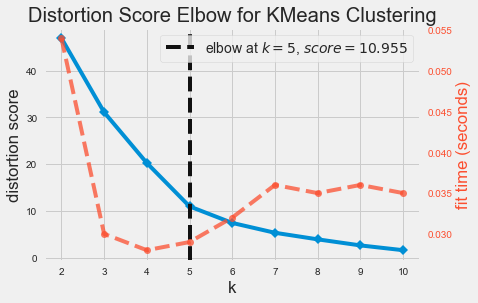

In [290]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(data_pca)
Elbow_M.show()

plt.show()

Theo **Elbow** cho kết quả **K = 5**.

Giờ ta sẽ chọn cách khác đó là **silhouette method** để kiểm chứng.

- <span style="color: rgba(0, 0, 0, 0.7); font-family: Inter, sans-serif;">Silhouette method</span>

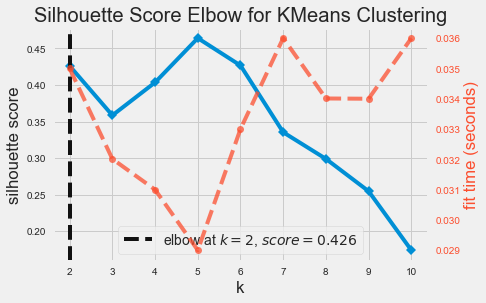

In [291]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10, metric='silhouette')
Elbow_M.fit(data_pca)
Elbow_M.show()

plt.show()

In [292]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.show()

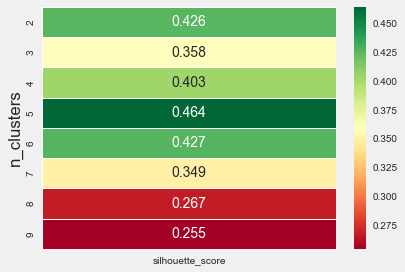

In [293]:
visualize_silhouette_layer(data_pca)

**K = 5** có số điểm cao nhất và cho ra kết quả tương tự **Elbow method** nên sẽ chọn nó cho việc phân cụm.

In [294]:
km = KMeans(n_clusters=5, random_state=42)

yhat_AC = km.fit_predict(data_pca)

data_pca["Clusters"] = yhat_AC   # for evaluating the model
dataStock["Clusters"]= yhat_AC        # for customers profiling

<a id = "7"></a>
# <p style="background-color:navy;font-family:Tahoma;color:ivory;font-size:150%;text-align:center;border-radius:10px 0px;">Evaluating Models</p>

**Profiling**

* Purchasing behavior by clusters
    * 'LoiNhuanRong', 'KeHoach', 'PhanTram_KeHoach', 'EPS', 'PE'
    
    
* Personal information by clusters
    * 'MaCoPhieu', 'SanChungKhoan'




In [295]:
dataStock.head(1)

,MaCoPhieu,SanChungKhoan,LoiNhuanRong_2021,LoiNhuanRong_2020,KeHoach,PhanTram_KeHoach,EPS,PE,PE_,Clusters
22,13,1,2382.923585,692.77,880.0,271.0,7683.0,10.0,0,0


<br>

### **<p style="background-color:white;font-family:tahoma;color:navy;font-size:120%;text-align:left">Simple Summary of Each Cluster</p>**


**1. Value counting**

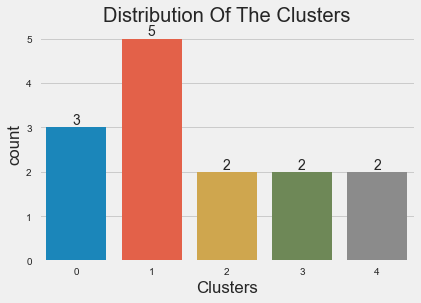

In [296]:
# Plotting countplot of clusters

ax = sns.countplot(x=dataStock["Clusters"])
ax.bar_label(ax.containers[0])
ax.set_title("Distribution Of The Clusters")
plt.show()

**2\. So sánh PE và EPS cho mỗi cluster**

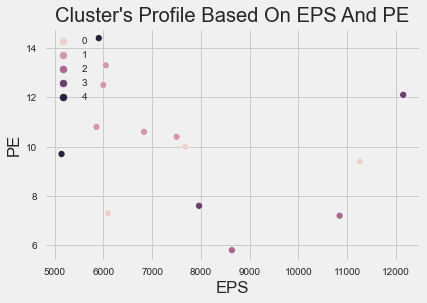

In [297]:
ax = sns.scatterplot(data = dataStock,x=dataStock["EPS"], y=dataStock["PE"], hue=dataStock["Clusters"])
ax.set_title("Cluster's Profile Based On EPS And PE")
plt.legend()
plt.show()

In [227]:
cluster_0 = dataStock.loc[dataStock.Clusters ==0, ["MaCoPhieu", "PE", "EPS"]]
cluster_0

,MaCoPhieu,PE,EPS
22,13,10.0,7683.0
146,10,9.4,11262.0
678,6,7.3,6100.0


In [228]:
cluster_0.to_csv(r'C:\Users\Admin\Desktop\K_Means\PE\cluster_0.csv', index = False, header = True)

In [229]:
cluster_1 = dataStock.loc[dataStock.Clusters ==1, ["MaCoPhieu", "PE", "EPS"]]
cluster_1

,MaCoPhieu,PE,EPS
263,3,10.6,6836.0
315,5,12.5,6001.0
393,0,10.4,7503.0
429,11,13.3,6052.0
596,9,10.8,5860.0


In [230]:
cluster_1.to_csv(r'C:\Users\Admin\Desktop\K_Means\PE\cluster_1.csv', index = False, header = True)

In [231]:
cluster_2 = dataStock.loc[dataStock.Clusters ==2, ["MaCoPhieu", "PE", "EPS"]]
cluster_2

,MaCoPhieu,PE,EPS
124,4,5.8,8636.0
317,12,7.2,10845.0


In [232]:
cluster_2.to_csv(r'C:\Users\Admin\Desktop\K_Means\PE\cluster_2.csv', index = False, header = True)

In [233]:
cluster_3 = dataStock.loc[dataStock.Clusters ==3, ["MaCoPhieu", "PE", "EPS"]]
cluster_3

,MaCoPhieu,PE,EPS
39,1,12.1,12149.375
503,2,7.6,7964.000


In [234]:
cluster_3.to_csv(r'C:\Users\Admin\Desktop\K_Means\PE\cluster_3.csv', index = False, header = True)

In [235]:
cluster_4 = dataStock.loc[dataStock.Clusters ==4, ["MaCoPhieu", "PE", "EPS"]]
cluster_4

,MaCoPhieu,PE,EPS
278,8,14.4,5907.0
502,7,9.7,5144.0


In [236]:
cluster_4.to_csv(r'C:\Users\Admin\Desktop\K_Means\PE\cluster_4.csv', index = False, header = True)

<br>

<a id = "9"></a>
# <p style="background-color:navy;font-family:Tahoma;color:ivory;font-size:150%;text-align:center;border-radius:10px 0px;">Conclusion</p>

- **`PE`, `EPS` and `%KeHoach` features là khá quan trọng để tách clusters và giải thích cho từng clusters.**
    
- **Và việc lựa chọn các cổ phiếu dựa trên các chỉ số này cũng chưa hẳn được xem là tốt để chọn cổ phiếu vì trong thị trường chứng khoán nó phụ thuộc vào nhiều yếu tố khác nhau. Chẳng hạn, các cổ phiếu sẽ bị tác động bởi báo cáo tài chính, các chỉ báo kỹ thuật thậm chí dựa vào tin tức.**
    
- **Do đó, bài làm này chỉ mang tính chất tham khảo. Chúng ta phải cần trau dồi kiến thức thêm để phục vụ đầu tư tốt hơn**  
      
    
_**Cảm ơn thầy và các bạn đã lắng nghe phần trình bày này!**_